In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense,Input
from tensorflow.keras.callbacks import EarlyStopping,LambdaCallback
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline
print("imported")

imported


In [ ]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()
x_train = x_train.astype('float')/255.
x_test = x_test.astype('float')/255.
x_train = np.reshape(x_train,(60000,784))
x_test = np.reshape(x_test,(10000,784))
print(x_test.shape)
x_train.shape

(10000, 784)


(60000, 784)

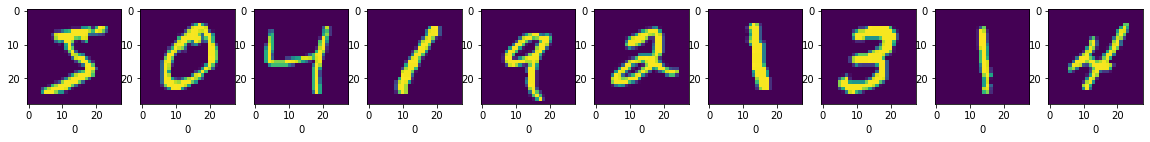

In [ ]:
x_train_noisy = x_train + np.random.rand(60000,784)*0.9
x_test_noisy = x_test + np.random.rand(10000,784)*0.9
x_train_noisy = np.clip(x_train_noisy,0.,1.)
x_test_noisy = np.clip(x_test_noisy,0.,1.)
def plot(x,p,labels=True):
    plt.figure(figsize=(20,2))
    for i in range(10):
        plt.subplot(1,10,i+1)
        plt.imshow(x[i].reshape(28,28))
        #plt.xticks([])
        #plt.yticks([])
        if labels:
            plt.xlabel(np.argmax(p[i]))
            #print(p[i])
    plt.show()
plot(x_train,y_train)

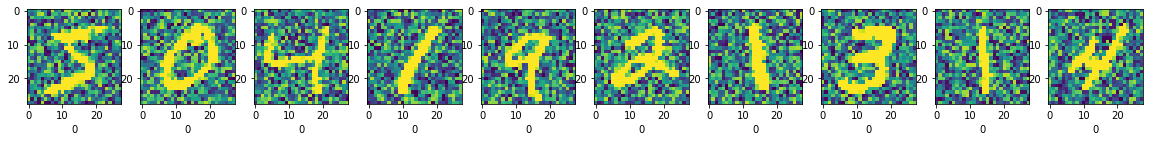

In [ ]:
plot(x_train_noisy,y_train)

In [ ]:
classifier = Sequential([Dense(512,activation='relu',input_shape=(784,)),
                         Dense(512,activation='relu'),
                         Dense(256,activation='relu'),
                         Dense(256,activation='relu'),
                         Dense(128,activation='relu'),
                         Dense(10,activation='softmax')])
classifier.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 512)               401920    
                                                                 
 dense_7 (Dense)             (None, 512)               262656    
                                                                 
 dense_8 (Dense)             (None, 256)               131328    
                                                                 
 dense_9 (Dense)             (None, 256)               65792     
                                                                 
 dense_10 (Dense)            (None, 128)               32896     
                                                                 
 dense_11 (Dense)            (None, 10)                1290      
                                                                 
Total params: 895,882
Trainable params: 895,882
Non-tr

In [ ]:
classifier.fit(x_train,y_train,batch_size=512,epochs=3)

Epoch 1/3
118/118 [==============================] - 1s 8ms/step - loss: 0.3488 - accuracy: 0.8997
Epoch 2/3
118/118 [==============================] - 1s 8ms/step - loss: 0.1072 - accuracy: 0.9679
Epoch 3/3
118/118 [==============================] - 1s 8ms/step - loss: 0.0686 - accuracy: 0.9791


In [ ]:
loss,acc = classifier.evaluate(x_test,y_test)
print(loss)
print(acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.0798 - accuracy: 0.9744
0.0798262283205986
0.974399983882904


In [ ]:
loss,acc = classifier.evaluate(x_test_noisy,y_test)
print(loss)
print(acc)

313/313 [==============================] - 1s 4ms/step - loss: 4.9193 - accuracy: 0.3271
4.919272422790527
0.32710000872612


In [ ]:
prediction = classifier.predict(x_test)
print(prediction.shape)
#plot(prediction,y_test)

(10000, 10)


In [ ]:
prediction = classifier.predict(x_test_noisy)

In [ ]:
#512,128,128,64 previous model
input_image = Input(shape=(784,))
encoder = Dense(512,activation='relu')(input_image)
encoder = Dense(256,activation='relu')(encoder)
encoder = Dense(128,activation='relu')(encoder)

encoded = Dense(64,activation='linear')(encoder)

decoder = Dense(128,activation='relu')(encoded)
decoder = Dense(256,activation='relu')(decoder)
decoder = Dense(512,activation='relu')(decoder)
decoded = Dense(784,activation='sigmoid')(decoder)

autoencoder = Model(input_image,decoded)
autoencoder.compile(loss='mse',optimizer='adam',metrics=['accuracy'])


In [ ]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_7 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_8 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_9 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_10 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_11 (Dense)             (None, 256)               33024 

In [ ]:
h = autoencoder.fit(x_train_noisy,x_train,
                epochs=100,                  #take epochs as 100
                batch_size=512,
                #steps_per_epoch=118       #60000/512=118
                validation_split=0.2,      #60000*0.2=12000
                verbose=1,                 #verbose maybe 0,1 or 2
                validation_data=(x_test_noisy,x_test),shuffle=True
                #callbacks=[EarlyStopping(monitor='val_loss',patience=3)]
                )

Epoch 1/100
94/94 [==============================] - 8s 80ms/step - loss: 0.0117 - accuracy: 0.0149 - val_loss: 0.0134 - val_accuracy: 0.0149
Epoch 2/100
94/94 [==============================] - 7s 79ms/step - loss: 0.0116 - accuracy: 0.0149 - val_loss: 0.0131 - val_accuracy: 0.0134
Epoch 3/100
94/94 [==============================] - 7s 79ms/step - loss: 0.0114 - accuracy: 0.0150 - val_loss: 0.0136 - val_accuracy: 0.0159
Epoch 4/100
94/94 [==============================] - 8s 82ms/step - loss: 0.0114 - accuracy: 0.0152 - val_loss: 0.0131 - val_accuracy: 0.0150
Epoch 5/100
94/94 [==============================] - 9s 93ms/step - loss: 0.0114 - accuracy: 0.0144 - val_loss: 0.0128 - val_accuracy: 0.0153
Epoch 6/100
94/94 [==============================] - 7s 79ms/step - loss: 0.0112 - accuracy: 0.0145 - val_loss: 0.0132 - val_accuracy: 0.0175
Epoch 7/100
94/94 [==============================] - 8s 80ms/step - loss: 0.0112 - accuracy: 0.0146 - val_loss: 0.0130 - val_accuracy: 0.0153
Epoch 

In [ ]:
loss,acc = autoencoder.evaluate(x_test_noisy,x_test)
print(loss)
print(acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.0108 - accuracy: 0.0130
0.010835746303200722
0.013000000268220901


In [ ]:
#without noise
loss,acc = autoencoder.evaluate(x_test,x_test)
print(loss)
print(acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.2310 - accuracy: 0.0014
0.23102273046970367
0.00139999995008111


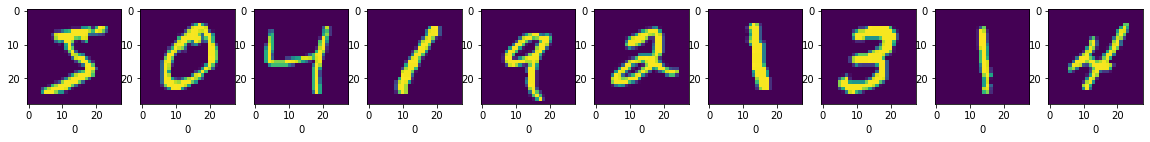

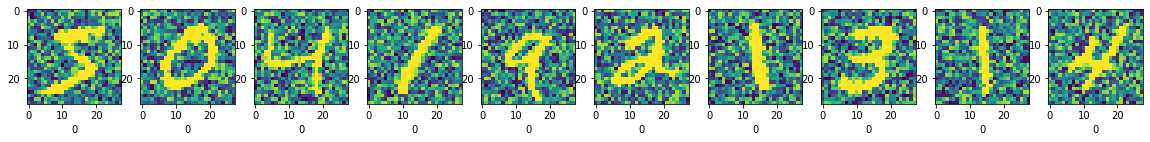

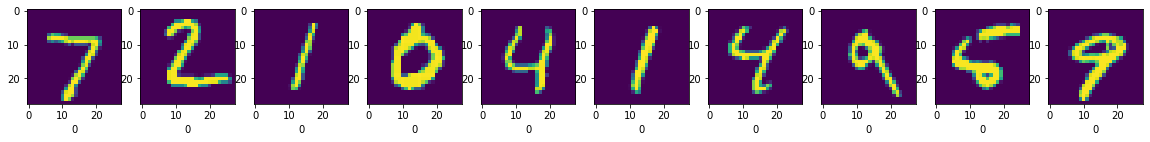

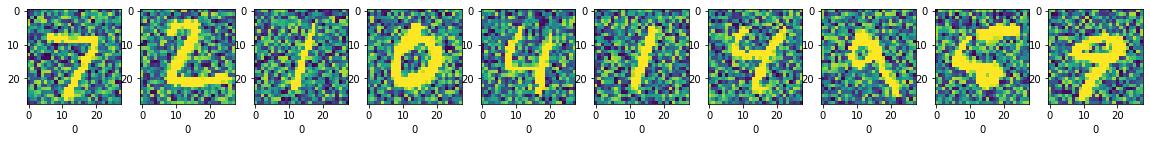

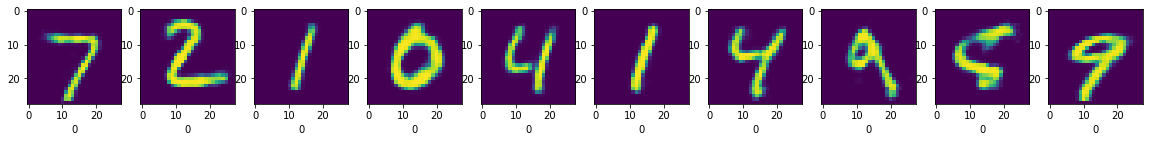

In [ ]:
prediction = autoencoder.predict(x_test_noisy)
plot(x_train,y_train)
plot(x_train_noisy,y_train)
plot(x_test,y_test)
plot(x_test_noisy,y_test)
plot(prediction,y_test)

In [ ]:
loss,acc = classifier.evaluate(prediction,y_test)
print(loss)
print(acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.1376 - accuracy: 0.9614
0.13757631182670593
0.9613999724388123


In [ ]:
h.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

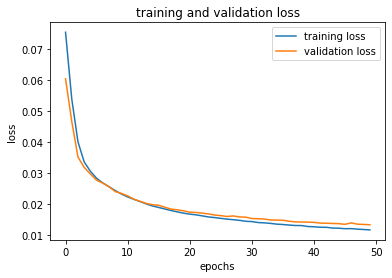

In [ ]:
plt.plot(h.history['loss'],label = 'training loss')
plt.plot(h.history['val_loss'],label = 'validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('training and validation loss')
plt.legend()
plt.show()

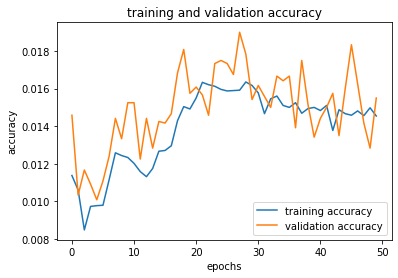

In [ ]:
plt.plot(h.history['accuracy'],label = 'training accuracy')
plt.plot(h.history['val_accuracy'],label = 'validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('training and validation accuracy')
plt.legend()
plt.show()

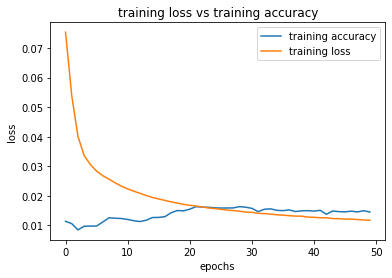

In [ ]:
plt.plot(h.history['accuracy'],label = 'training accuracy')
plt.plot(h.history['loss'],label = 'training loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('training loss vs training accuracy')
plt.legend()
plt.show()

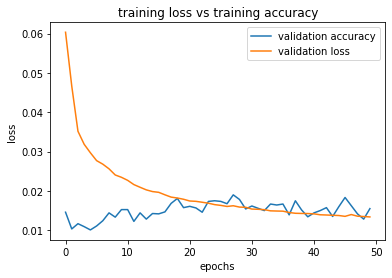

In [ ]:
plt.plot(h.history['val_accuracy'],label = 'validation accuracy')
plt.plot(h.history['val_loss'],label = 'validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('training loss vs training accuracy')
plt.legend()
plt.show()